In [167]:
#!pip install biopython
import pandas as pd
import numpy as np
import Bio as bio
import seaborn as sns

In [101]:
def FastaReader(fastafile):
    from Bio import SeqIO
    with open(fastafile) as fasta_file:  # Will close handle cleanly
        identifiers = []
        lengths = []
        seqs = []
        for seq_record in SeqIO.parse(fasta_file, 'fasta'):  # (generator)
            identifiers.append(seq_record.id)
            seqs.append(seq_record.seq)
        df = pd.DataFrame(index = identifiers, data = seqs)
        #df["Sequence"] = seqs
    return df

In [102]:
genomes = FastaReader('./ncbi_dataset/data/genomic.fna')
proteins = FastaReader('./ncbi_dataset/data/protein.faa')

In [103]:
#First high-quality complete genome of SARS CoV-2
#genomes.loc["MN988668.1"][0]

In [68]:
from Bio import pairwise2
genomes["align"] = genomes.apply(lambda x: pairwise2.align.globalxx(genomes.loc["MT072688.1"][0], x[0]))

In [ ]:
genomesplit = pd.DataFrame(genomes[0].apply(lambda x: list(x)))
genomesplit = pd.DataFrame(genomesplit[0].to_list())

In [168]:
import difflib
def genomecompare (y):
    tree = genomes[0].apply(lambda x: difflib.SequenceMatcher(None, str(y), str(x)).ratio())
    return pd.DataFrame(tree).sort_values(0, ascending = False)

In [172]:
str(genomes[0][4][0:100])

'GATTGCGAGCGATTTGCGTGCGTGCATCCCGCTTCACTGATCTCTTGTTAGATCTTTTCATAATCTAAACTTTATAAAAACATCCACTCCCTGTAGTCTA'

In [169]:
comparison = genomecompare(str(genomes[0][4]))

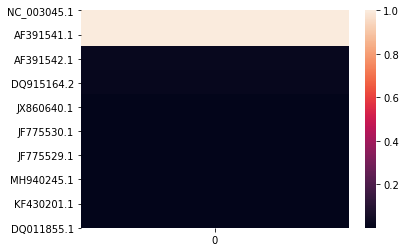

In [170]:
sns.heatmap(comparison.head(10))

In [ ]:
import seaborn as sns
sns.heatmap(tree)